1) Data Input

Load Nvidia’s historical stock price data, which includes daily high, low, open, last (close), trade volume

In [ ]:
# Import necessary libraries
import pandas as pd

# Load data from a CSV file
file_path = 'Nvidia_data.csv'  # Make sure to upload this file to your Colab session
nvidia_data = pd.read_csv(file_path)

# Ensure 'Date' column is in datetime format (if applicable)
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'], errors='coerce')


2) Verify Dataset for Missing or Zero Values

Check for any missing or zero values in the dataset to ensure data quality

In [ ]:
# Check for missing values
missing_values = nvidia_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for zero values in numerical columns
zero_values = (nvidia_data == 0).sum()
print("Zero values in each column:\n", zero_values)


Missing values in each column:
 Date            0
High            0
Low             0
Open            0
Last            0
Trade Volume    0
dtype: int64
Zero values in each column:
 Date            0
High            0
Low             0
Open            0
Last            0
Trade Volume    0
dtype: int64


3) Exploratory Data Analysis (EDA)
Scatter Plot Matrix, Distribution Plots, and Heatmap

To explore and visualize Nvidia’s stock data, providing insights into price patterns, volatility, and key correlations between metrics.

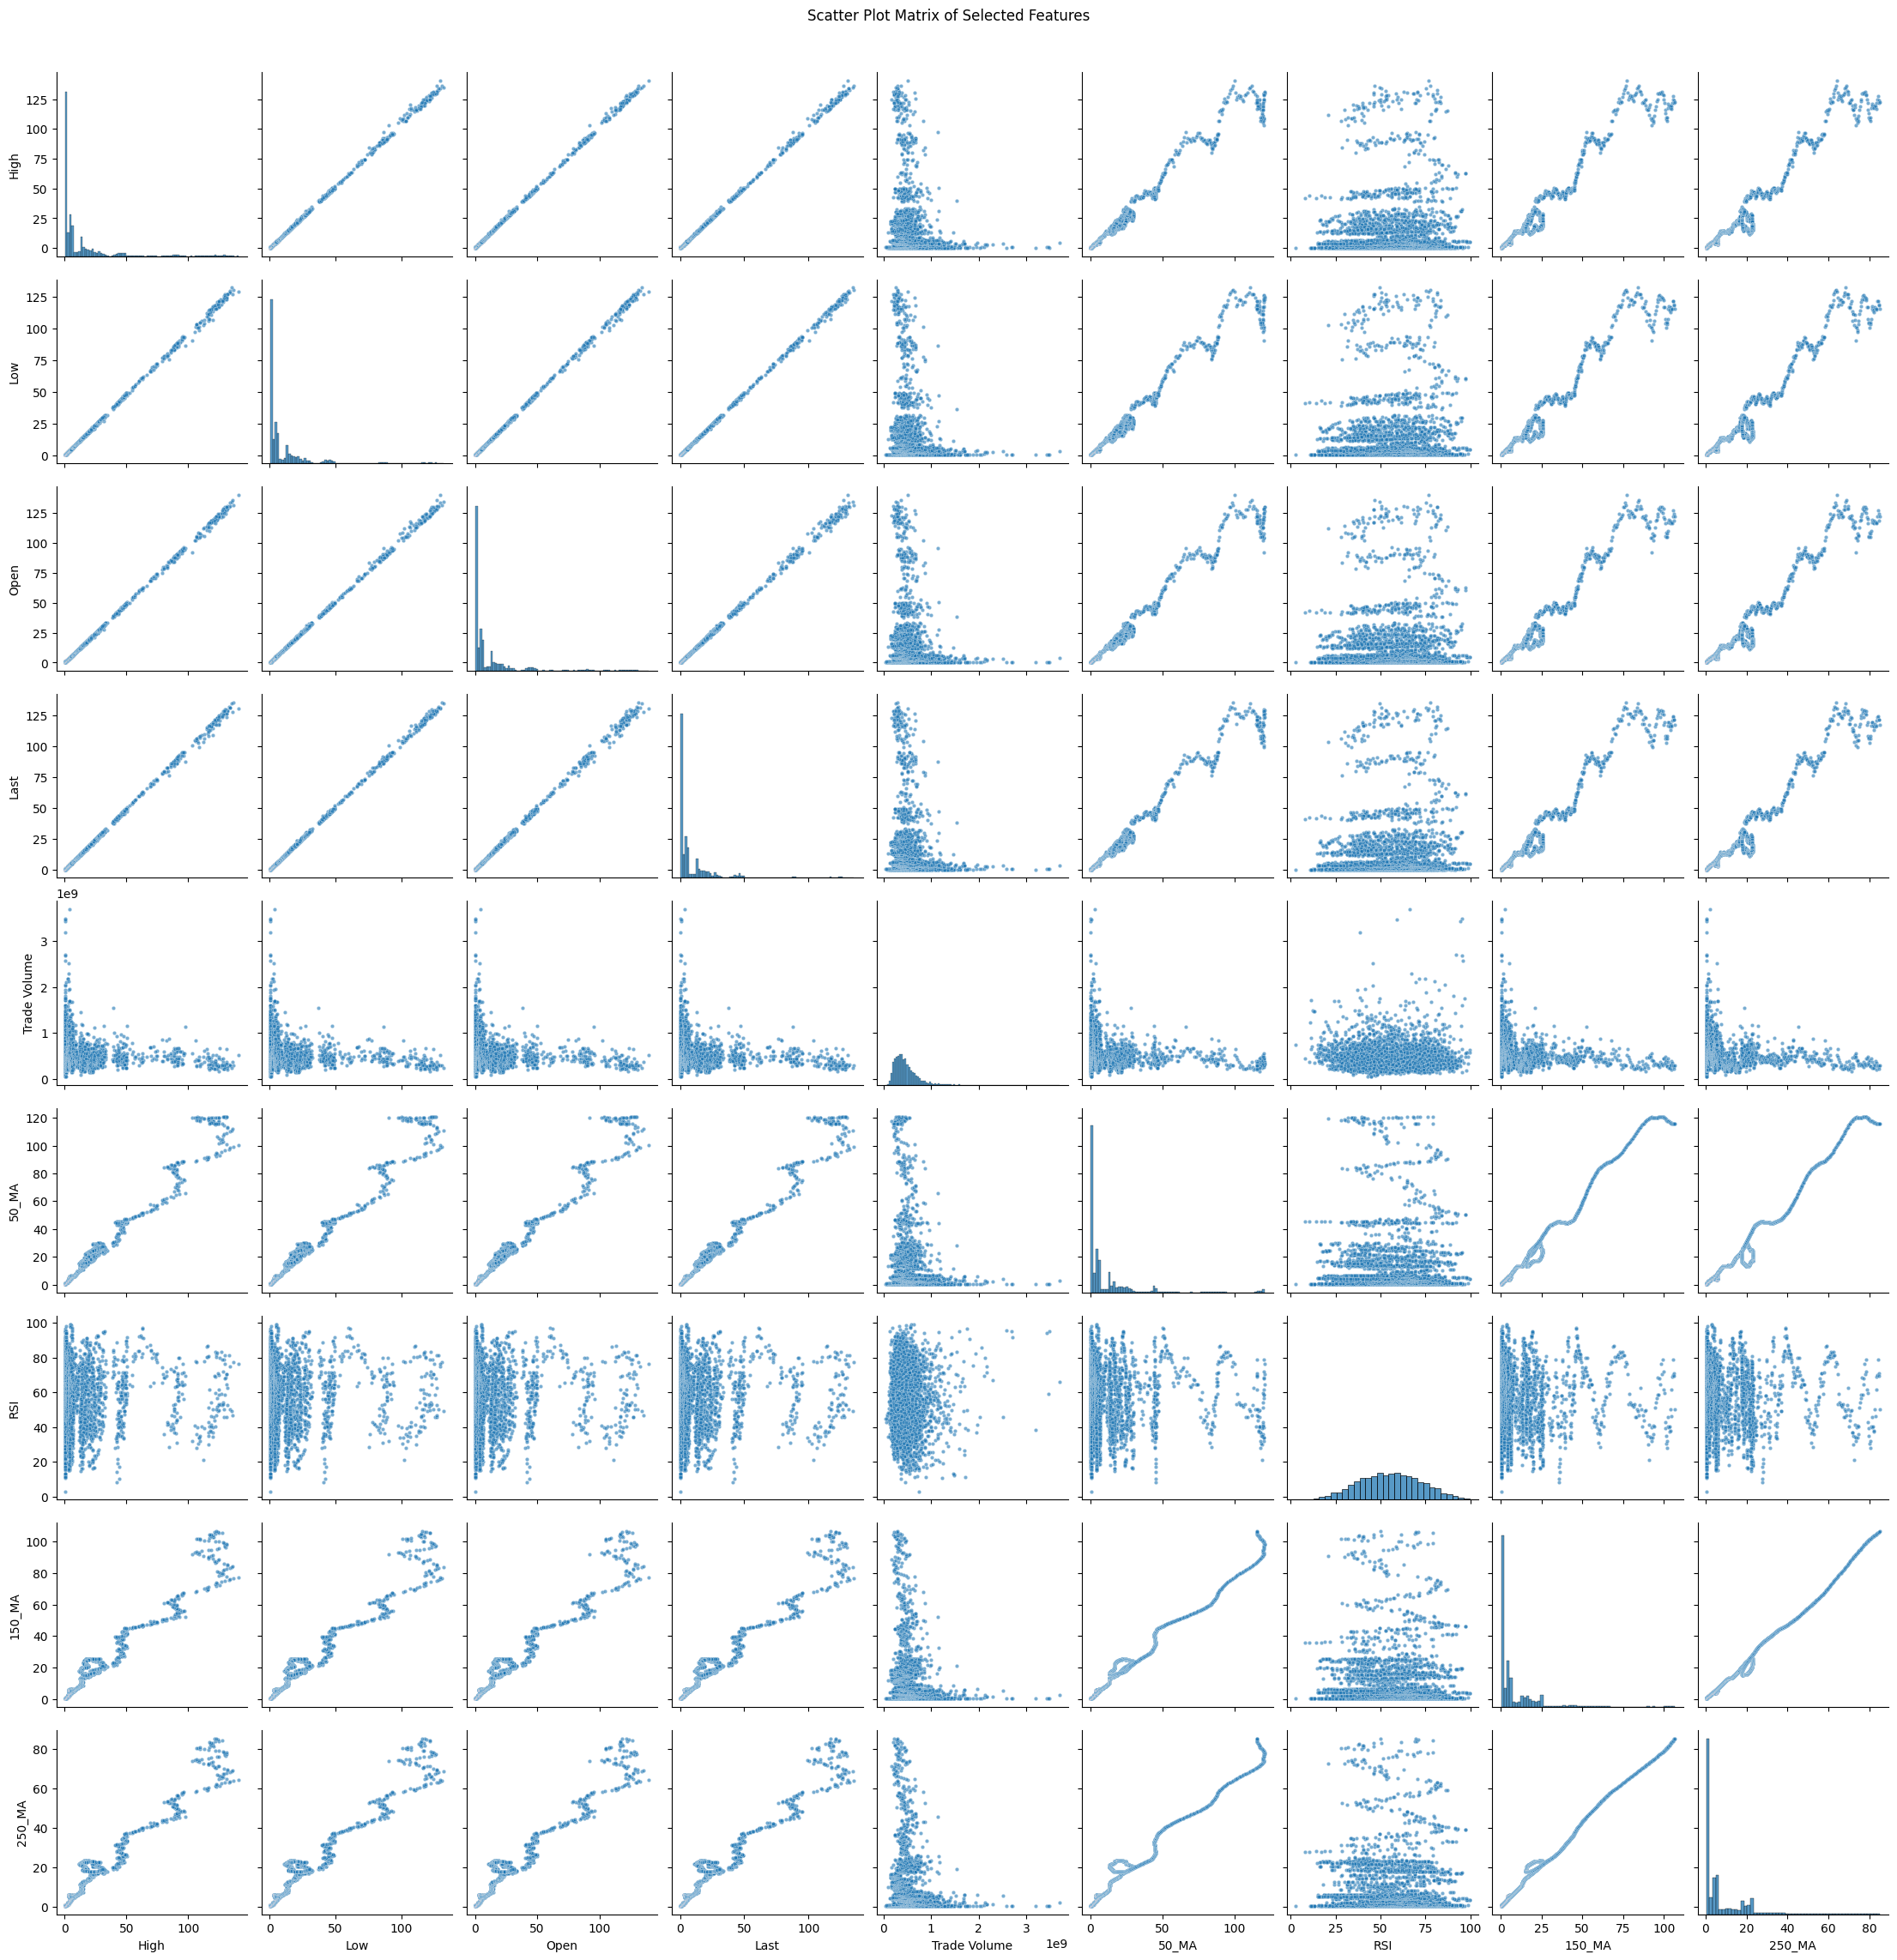

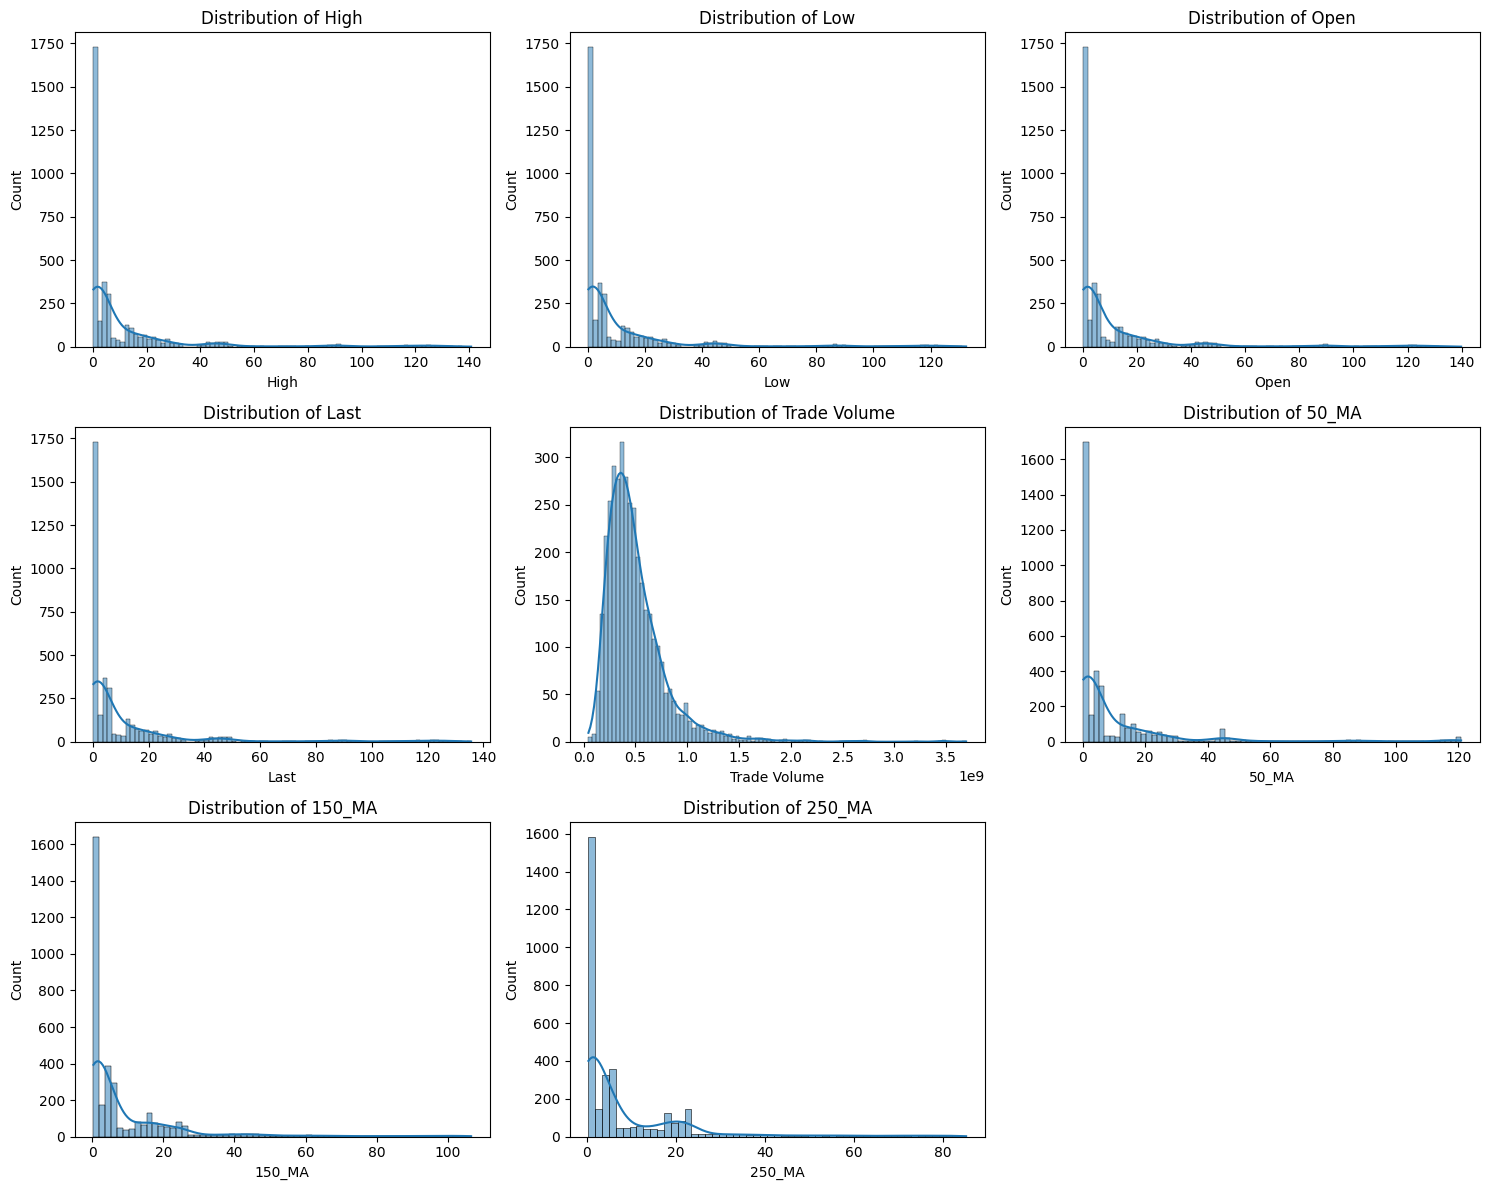

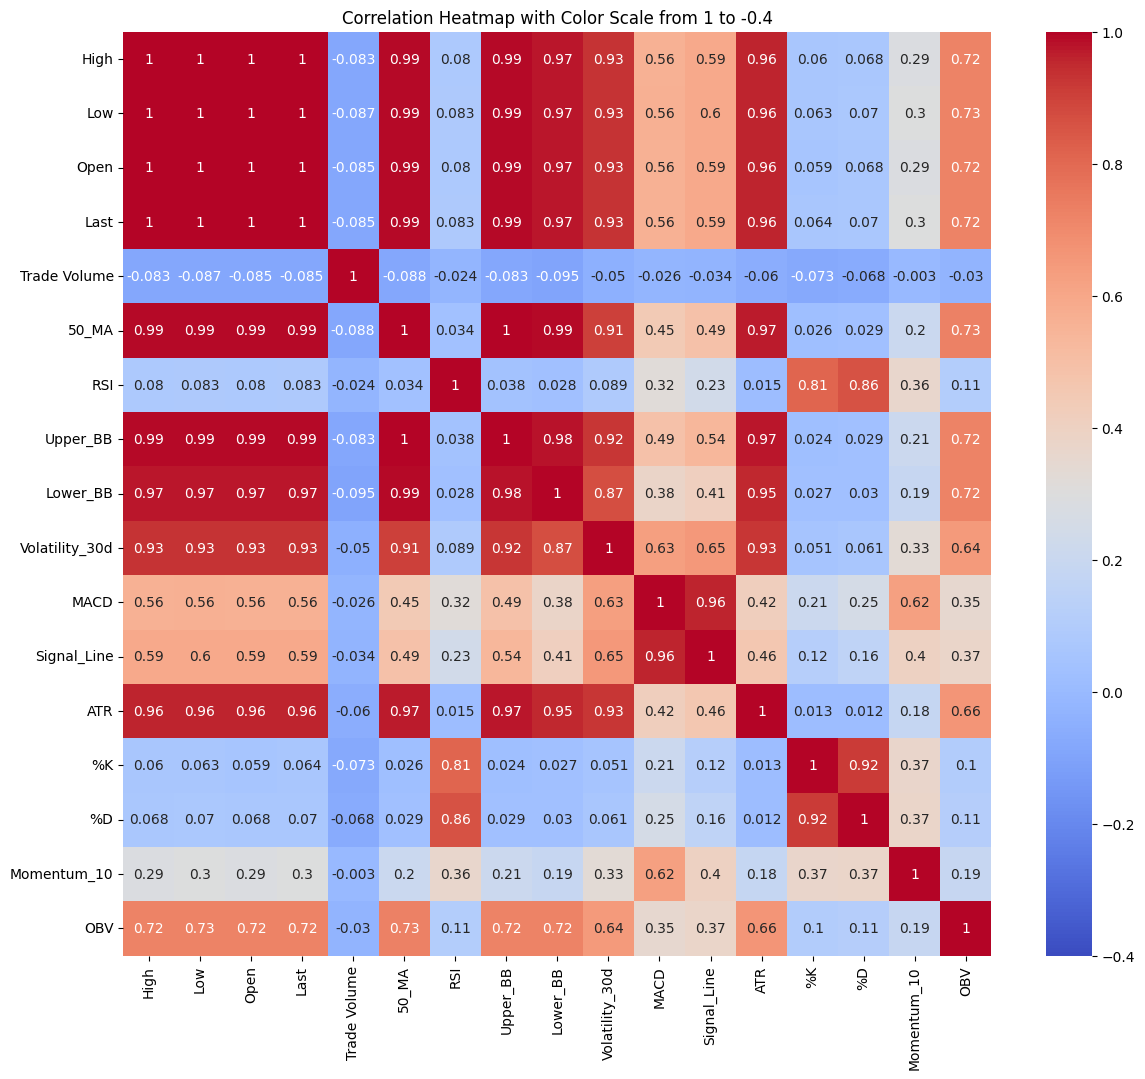

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define moving averages and RSI if they haven't been defined yet
nvidia_data['50_MA'] = nvidia_data['Last'].rolling(window=50).mean()
nvidia_data['150_MA'] = nvidia_data['Last'].rolling(window=150).mean()
nvidia_data['250_MA'] = nvidia_data['Last'].rolling(window=250).mean()

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nvidia_data['RSI'] = calculate_rsi(nvidia_data['Last'])

# Additional Technical Indicators (ATR, %K, %D, Momentum, OBV, Bollinger Bands, MACD)

# Average True Range (ATR)
nvidia_data['High_Low'] = nvidia_data['High'] - nvidia_data['Low']
nvidia_data['High_Close'] = np.abs(nvidia_data['High'] - nvidia_data['Last'].shift())
nvidia_data['Low_Close'] = np.abs(nvidia_data['Low'] - nvidia_data['Last'].shift())
nvidia_data['True_Range'] = nvidia_data[['High_Low', 'High_Close', 'Low_Close']].max(axis=1)
nvidia_data['ATR'] = nvidia_data['True_Range'].rolling(window=14).mean()

# Stochastic Oscillator (%K and %D)
nvidia_data['14_Low'] = nvidia_data['Low'].rolling(14).min()
nvidia_data['14_High'] = nvidia_data['High'].rolling(14).max()
nvidia_data['%K'] = 100 * ((nvidia_data['Last'] - nvidia_data['14_Low']) / (nvidia_data['14_High'] - nvidia_data['14_Low']))
nvidia_data['%D'] = nvidia_data['%K'].rolling(3).mean()

# Momentum Indicator (10-Day Momentum)
nvidia_data['Momentum_10'] = nvidia_data['Last'] - nvidia_data['Last'].shift(10)

# On-Balance Volume (OBV)
nvidia_data['Direction'] = np.where(nvidia_data['Last'] > nvidia_data['Last'].shift(), 1, -1)
nvidia_data['Volume_Flow'] = nvidia_data['Trade Volume'] * nvidia_data['Direction']
nvidia_data['OBV'] = nvidia_data['Volume_Flow'].cumsum()

# Bollinger Bands
nvidia_data['Upper_BB'] = nvidia_data['50_MA'] + (nvidia_data['Last'].rolling(window=50).std() * 2)
nvidia_data['Lower_BB'] = nvidia_data['50_MA'] - (nvidia_data['Last'].rolling(window=50).std() * 2)

# MACD and Signal Line
nvidia_data['EMA_12'] = nvidia_data['Last'].ewm(span=12, adjust=False).mean()
nvidia_data['EMA_26'] = nvidia_data['Last'].ewm(span=26, adjust=False).mean()
nvidia_data['MACD'] = nvidia_data['EMA_12'] - nvidia_data['EMA_26']
nvidia_data['Signal_Line'] = nvidia_data['MACD'].ewm(span=9, adjust=False).mean()

# Volatility (30-day Standard Deviation)
nvidia_data['Volatility_30d'] = nvidia_data['Last'].rolling(window=30).std()

# Scatter Plot Matrix
selected_features_for_scatter = ['High', 'Low', 'Open', 'Last', 'Trade Volume', '50_MA', 'RSI', '150_MA', '250_MA']
scatter_data_selected = nvidia_data[selected_features_for_scatter].dropna()
sns.pairplot(scatter_data_selected, kind="scatter", plot_kws={'s': 10, 'alpha': 0.6})
plt.suptitle("Scatter Plot Matrix of Selected Features", y=1.02)
plt.show()

# Distribution Plots for Numerical Features
num_columns = ['High', 'Low', 'Open', 'Last', 'Trade Volume', '50_MA', '150_MA', '250_MA']
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(nvidia_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Heatmap (latest version with color scale from 1 to -0.4)
heatmap_features = ['High', 'Low', 'Open', 'Last', 'Trade Volume', '50_MA', 'RSI', 'Upper_BB',
                    'Lower_BB', 'Volatility_30d', 'MACD', 'Signal_Line', 'ATR', '%K', '%D',
                    'Momentum_10', 'OBV']

# Drop rows with NaN values caused by rolling calculations for heatmap
heatmap_data = nvidia_data[heatmap_features].dropna()
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', vmin=-0.4, vmax=1)
plt.title('Correlation Heatmap with Color Scale from 1 to -0.4')
plt.show()


Explanation of indicators in Heatmap:

**High**: The highest price of the stock during the day, showing the peak value traders were willing to pay.


**Low**: The lowest price of the stock during the day, indicating the lowest value seen during the trading session.


**Open**: The price at which the stock started trading for the day, reflecting investor sentiment from the previous close.


**Last (Close)**: The final price of the stock for the day, commonly used as a benchmark for daily performance.


**Trade Volume**: The number of shares traded during the day, reflecting liquidity and investor interest.


**50_MA**: The 50-day moving average, a short-term trend indicator smoothing recent price fluctuations.
__________________________________________________________________________________


**RSI (Relative Strength Index)**: An indicator of momentum, with values above 70 suggesting overbought conditions and below 30 suggesting oversold.


**Upper_BB (Upper Bollinger Band)**: The upper limit of the Bollinger Bands, representing a high range of price based on recent volatility.


**Lower_BB (Lower Bollinger Band)**: The lower limit of the Bollinger Bands, representing a low range of price based on recent volatility.


**Volatility_30d**: The 30-day rolling standard deviation of closing prices, measuring recent price variability and risk.


**MACD (Moving Average Convergence Divergence)**: Shows the difference between the 12-day and 26-day EMAs, indicating trend direction and momentum.


**Signal_Line**: The 9-day EMA of MACD, often used to generate buy/sell signals when it crosses the MACD.


**ATR (Average True Range)**: The average range of price movement over the last 14 days, indicating volatility.


**%K (Stochastic Oscillator %K)**: Shows the position of the close relative to the high-low range over the last 14 days, indicating momentum.


**%D (Stochastic Oscillator %D)**: The 3-day moving average of %K, used to smooth short-term fluctuations and confirm momentum signals.


**Momentum_10**: The 10-day momentum, calculated as the difference between today’s closing price and the price 10 days ago, indicating price direction.


**OBV (On-Balance Volume)**: A cumulative measure of volume flow, showing buying/selling pressure based on volume and price changes.

4) Plot Stock Closing Prices with Moving Averages

Display Nvidia’s stock closing prices with 50-day, 150-day, and 250-day moving averages for a clear view of long-term trends.

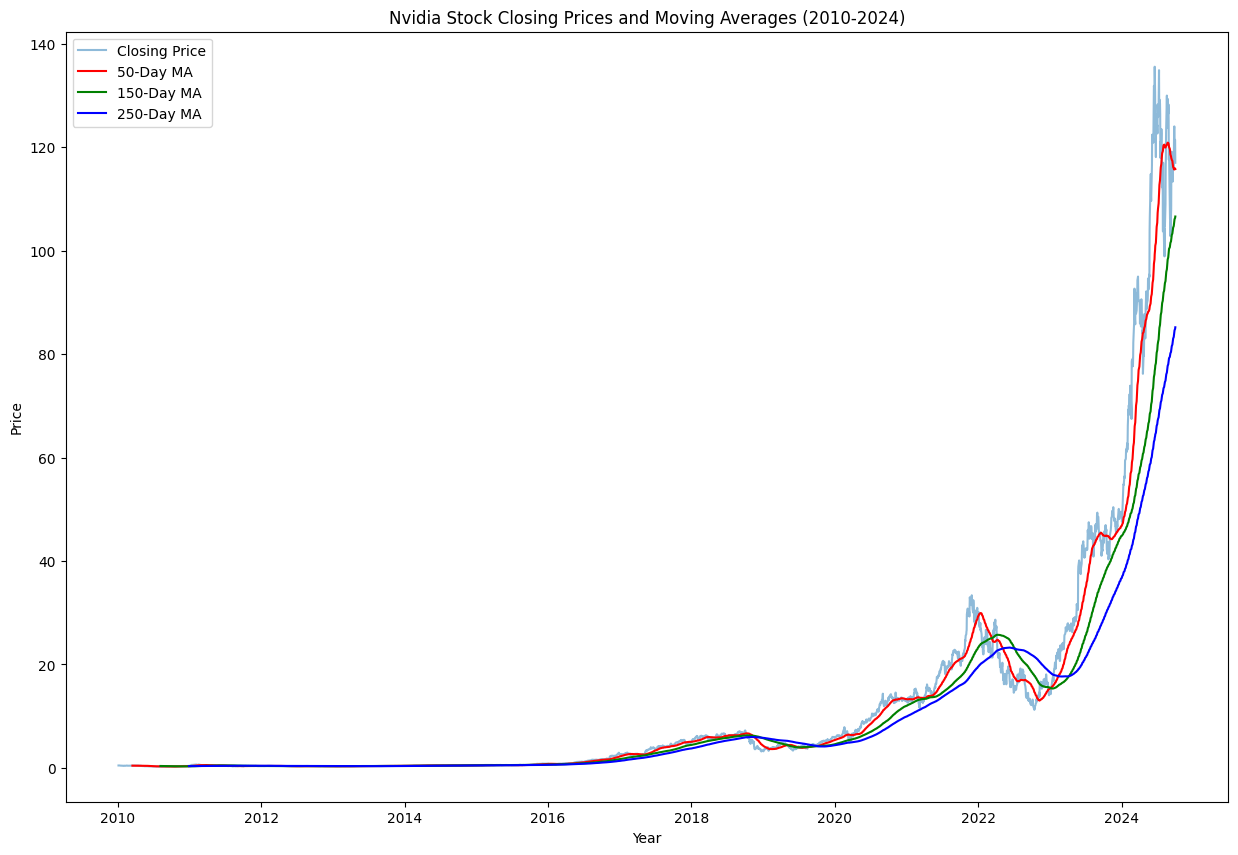

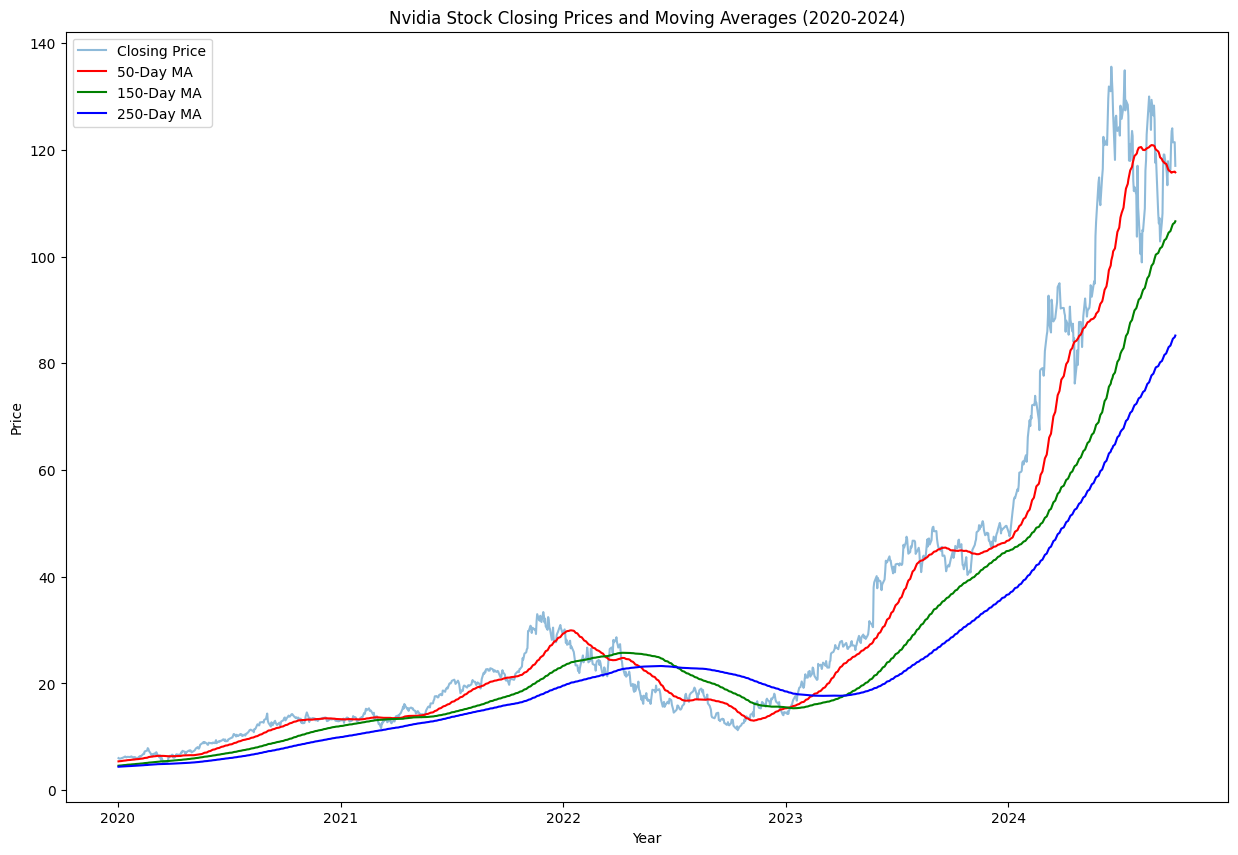

In [ ]:
# Define moving averages if not already defined
nvidia_data['50_MA'] = nvidia_data['Last'].rolling(window=50).mean()
nvidia_data['150_MA'] = nvidia_data['Last'].rolling(window=150).mean()
nvidia_data['250_MA'] = nvidia_data['Last'].rolling(window=250).mean()

# Full Date Range: 2015-2024
plt.figure(figsize=(15, 10))
plt.plot(nvidia_data['Date'], nvidia_data['Last'], label='Closing Price', alpha=0.5)
plt.plot(nvidia_data['Date'], nvidia_data['50_MA'], label='50-Day MA', color='red')
plt.plot(nvidia_data['Date'], nvidia_data['150_MA'], label='150-Day MA', color='green')
plt.plot(nvidia_data['Date'], nvidia_data['250_MA'], label='250-Day MA', color='blue')
plt.title('Nvidia Stock Closing Prices and Moving Averages (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Filtered Date Range: 2020-2024
nvidia_data_filtered = nvidia_data[(nvidia_data['Date'] >= '2020-01-01') & (nvidia_data['Date'] <= '2024-12-31')]
plt.figure(figsize=(15, 10))
plt.plot(nvidia_data_filtered['Date'], nvidia_data_filtered['Last'], label='Closing Price', alpha=0.5)
plt.plot(nvidia_data_filtered['Date'], nvidia_data_filtered['50_MA'], label='50-Day MA', color='red')
plt.plot(nvidia_data_filtered['Date'], nvidia_data_filtered['150_MA'], label='150-Day MA', color='green')
plt.plot(nvidia_data_filtered['Date'], nvidia_data_filtered['250_MA'], label='250-Day MA', color='blue')
plt.title('Nvidia Stock Closing Prices and Moving Averages (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


5) Model Selection: Logistic Regression, Random Forest, and XGBoost

 Train and compare models to predict the stock’s next-day movement as either up or down. We tested three models to see which can best capture Nvidia’s stock price movement patterns. Logistic Regression provides a simple linear approach, Random Forest captures more complex patterns with decision trees, and XGBoost, a powerful boosting algorithm, refines predictions by correcting errors from prior iterations.

Split Breakdown
Training Set (70%): This portion will be the earlier dates in the dataset, forming the basis for training the model.
Testing Set (30%): The last 30% of the dataset is reserved for testing and evaluating the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create target column (Price Up/Down Next Day)
nvidia_data['Price_Change'] = nvidia_data['Last'].shift(-1) > nvidia_data['Last']
nvidia_data['Price_Change'] = nvidia_data['Price_Change'].astype(int)

# Feature selection and train-test split
features = ['High', 'Low', 'Open', 'Last', 'Trade Volume']
X = nvidia_data[features].dropna()
y = nvidia_data['Price_Change'][:len(X)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
print("Logistic Regression Results:")
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest Classifier
print("Random Forest Results:")
model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# XGBoost Classifier
print("XGBoost Results:")
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Logistic Regression Results:
Accuracy: 0.5341113105924596
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.16      0.23       507
           1       0.55      0.85      0.67       607

    accuracy                           0.53      1114
   macro avg       0.51      0.50      0.45      1114
weighted avg       0.51      0.53      0.47      1114

Random Forest Results:
Accuracy: 0.45691202872531417
Classification Report:
               precision    recall  f1-score   support

           0       0.46      1.00      0.63       507
           1       1.00      0.00      0.01       607

    accuracy                           0.46      1114
   macro avg       0.73      0.50      0.32      1114
weighted avg       0.75      0.46      0.29      1114

XGBoost Results:
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       507
           1       0.54

1) Logistic Regression
Accuracy: 53.4%

This means the model correctly predicted the stock’s movement around 53% of the time, slightly better than random guessing (50%).


2) Random Forest
Accuracy: 45.6%

This means the model correctly predicted the stock’s movement around 45.7% of the time, slightly worse than random guessing (50%).

3) XGBoost
Accuracy: 50%

The accuracy here is essentially equivalent to random guessing.

**Logistic Regression** provided the best prediction among 3 models. Therefore, we will use it as our trading strategy to calculate the returns.

6) Calculate Returns

Simulate a trading strategy based on model predictions and calculate the final return on investment.


In [ ]:
# Step 1: Calculate Daily Returns (Percentage Change in Closing Price)
nvidia_data['Daily_Return'] = nvidia_data['Last'].pct_change()  # Percentage change in closing price

# Step 2: Use Logistic Regression predictions to buy or sell
# If '1' is predicted (price up), we buy; if '0' is predicted (price down), we sell.

# Create a DataFrame to store test period data and model predictions
test_data = nvidia_data.iloc[len(X_train):].copy()  # Data corresponding to the test set
test_data['Predicted'] = y_pred_lr  # Add the Logistic Regression model's predictions
test_data['True_Movement'] = y_test  # Add the true up/down values

# Step 3: Initialize variables to track returns and trades
initial_balance = 10000  # Starting with $10,000
balance = initial_balance
holdings = 0  # Number of stocks you hold
cash = balance  # Initial cash
trades = 0  # To count the number of trades

# Step 4: Simulate trading based on predictions
for i in range(1, len(test_data)):
    if test_data['Predicted'].iloc[i] == 1:  # Logistic Regression predicts price up, we buy
        if cash > 0:  # Only buy if we have cash available
            # Buy stock using all available cash
            stock_price = test_data['Last'].iloc[i]
            holdings = cash / stock_price  # Number of stocks we can buy
            cash = 0  # We used all our cash to buy stocks
            trades += 1  # We executed a trade (buy)

    elif test_data['Predicted'].iloc[i] == 0:  # Logistic Regression predicts price down, we sell
        if holdings > 0:  # Only sell if we have stock to sell
            stock_price = test_data['Last'].iloc[i]
            cash = holdings * stock_price  # Sell all stocks
            holdings = 0  # Now we hold no stocks
            trades += 1  # We executed a trade (sell)

    # Update balance based on cash and current holdings
    current_price = test_data['Last'].iloc[i]
    balance = cash + (holdings * current_price)  # Total value = cash + value of holdings

# Step 5: Calculate final return
final_return = (balance - initial_balance) / initial_balance * 100

# Step 6: Output the results with additional info

# Get the start and end date of the test period
start_date = test_data['Date'].iloc[0]
end_date = test_data['Date'].iloc[-1]

print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${balance:.2f}")
print(f"Total Return: {final_return:.2f}%")
print(f"Trading period: From {start_date.date()} to {end_date.date()}")
print(f"Total number of trades executed: {trades}")

Initial Balance: $10000
Final Balance: $198716.37
Total Return: 1887.16%
Trading period: From 2020-04-29 to 2024-10-01
Total number of trades executed: 301
